In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.widgets import Button
import h5py as h5



    
class Mx2Data:
    def __init__(self, filename):
        self.file = uproot.open(filename)

        self.hits_id_per_mod = self.file["minerva"]["hits_id_per_mod"].array(library="np")
        self.hit_strip = self.file["minerva"]["hit_strip"].array(library="np")
        self.hit_plane = self.file["minerva"]["hit_plane"].array(library="np")
        self.hit_module = self.file["minerva"]["hit_module"].array(library="np")
        self.hit_view = self.file["minerva"]["hit_view"].array(library="np")
        self.n_odhits = self.file["minerva"]["n_odhits"].array(library="np")
        self.hits_od_per_mod = self.file["minerva"]["hits_od_per_mod"].array(library="np")
        self.hit_bar = self.file["minerva"]["hit_bar"].array(library="np")
        self.hit_pe = self.file["minerva"]["hit_pe"].array(library="np")
        self.hit_time = self.file["minerva"]["hit_time"].array(library="np")
        self.hit_time_slice = self.file["minerva"]["hit_time_slice"].array(library="np")
        self.hit_norm_energy = self.file["minerva"]["hit_norm_energy"].array(library="np")

        self.offsetX = self.file["minerva"]["offsetX"].array(library="np")
        self.offsetY = self.file["minerva"]["offsetY"].array(library="np")
        self.offsetZ = self.file["minerva"]["offsetZ"].array(library="np")

        self.ev_gps_time_sec = self.file["minerva"]["ev_gps_time_sec"].array(library="np")
        self.ev_gps_time_usec = self.file["minerva"]["ev_gps_time_usec"].array(library="np")

        self.n_slices = self.file["minerva"]["n_slices"].array(library="np")

        self.clus_id_coord = self.file["minerva"]["clus_id_coord"].array(library="np")
        self.clus_id_z = self.file["minerva"]["clus_id_z"].array(library="np")
        self.clus_id_module = self.file["minerva"]["clus_id_module"].array(library="np")
        self.clus_id_strip = self.file["minerva"]["clus_id_strip"].array(library="np")
        self.clus_id_view = self.file["minerva"]["clus_id_view"].array(library="np")
        self.clus_id_pe = self.file["minerva"]["clus_id_pe"].array(library="np")
        self.clus_id_energy = self.file["minerva"]["clus_id_energy"].array(library="np")
        self.clus_id_time_slice = self.file["minerva"]["clus_id_time_slice"].array(library="np")
        self.clus_id_type = self.file["minerva"]["clus_id_type"].array(library="np")
        self.clus_id_hits_idx = self.file["minerva"]["clus_id_hits_idx"].array(library="np")
        self.clus_id_size = self.file["minerva"]["clus_id_size"].array(library="np")

        self.minerva_time = (self.ev_gps_time_sec )+(self.ev_gps_time_usec)*1e-6
        # self.minerva_trigger = np.array(self.minerva_time/1.2e6).astype(int)

        self.hits_id_per_mod = self.file["minerva"]["hits_id_per_mod"].array(library="np")
        self.hit_strip = self.file["minerva"]["hit_strip"].array(library="np")
        
        self.n_tracks = self.file["minerva"]["n_tracks"].array(library="np") 
        self.trk_theta = self.file["minerva"]["trk_theta"].array(library="np") 
        self.trk_phi = self.file["minerva"]["trk_phi"].array(library="np") 
        self.n_blobs_id = self.file["minerva"]["n_blobs_id"].array(library="np")
        self.trk_vis_energy = self.file["minerva"]["trk_vis_energy"].array(library="np")
        self.trk_type = self.file["minerva"]["trk_type"].array(library="np")
        self.trk_patrec = self.file["minerva"]["trk_patrec"].array(library="np")
        self.trk_time_slice = self.file["minerva"]["trk_time_slice"].array(library="np")
        self.trk_chi2perDof = self.file["minerva"]["trk_chi2perDof"].array(library="np")
        self.trk_node_chi2 = self.file["minerva"]["trk_node_chi2"].array(library="np")
        self.trk_index = self.file["minerva"]["trk_index"].array(library="np")
        self.trk_nodes = self.file["minerva"]["trk_nodes"].array(library="np")
        self.trk_node_X = self.file["minerva"]["trk_node_X"].array(library="np")
        self.trk_node_Y = self.file["minerva"]["trk_node_Y"].array(library="np")
        self.trk_node_aX = self.file["minerva"]["trk_node_aX"].array(library="np")
        self.trk_node_aY = self.file["minerva"]["trk_node_aY"].array(library="np")
        self.trk_node_Z = self.file["minerva"]["trk_node_Z"].array(library="np")
        self.trk_node_cluster_idx = self.file["minerva"]["trk_node_cluster_idx"].array(library="np")

        
class NdData:
    def __init__(self, filename):
        self.flow_file = h5.File(filename, 'r')

        self.data = self.flow_file['charge']['calib_prompt_hits']['data']
        self.data_light = self.flow_file['light']['flash']['data']
        self.event = self.flow_file['charge/events/data']
        self.event_light = self.flow_file['light/events/data']
        self.match_region = self.flow_file['charge/events/ref/charge/calib_prompt_hits/ref_region']
        self.match_region_light = self.flow_file['light/events/ref/light/flash/ref_region']
        self.nd_time = self.event.fields("unix_ts")[:] + self.event.fields("ts_start")[:]/1e7
        self.nd_trigger = ((self.event.fields("unix_ts")[:] + self.event.fields("ts_start")[:]/1e7)).astype(int)

        self.nd_time_light = self.event_light.fields("utime_ms")[:] # unsure of this variable


# Mx2 conversion 
def strip_to_x(x, offsetY = 0, offsetX = 0, view = 1):
    tot_offset = offsetX
    if (view==2):
        tot_offset = calcUfromXY(offsetX, offsetY)
    if (view==3):
        tot_offset = calcVfromXY(offsetX, offsetY)
    return( 16.738776 * x  -1071.2776 - tot_offset) 

def module_to_z(x, offset = 0):
    if (x < 13):
        return(4001.4545 + x * 43.545455) - offset
    return(44.783333  * x + 8015.4947) - offset


def module_to_z_mr5(x, offset = 0, view = 1):

    # if (view <1):
    #     if (x < 13):
    #         return(4540.15 + (x-1) * 43.4) - offset
    #     if (x<=32):
    #         return(43.4  * (x-13) + 8598.01) - offset
    #     if (x==33):
    #         return (9473.92 - offset)
    #     else :
    #         return ((x-34)*93.4 + 9567 - offset)
    # else:
    #     if (x<13):
    #         return ((x-1) * 43.6 + 4538.63 - offset)
    #     if (x<= 32):
    #         return ((x-13) * 43.6 + 8577.17 - offset)
    #     if (x==33):
    #         return (9520.5 - offset)
    #     else :
    #         return ((x-34) * 93.5 + 9614.49 - offset)


    if (view ==1):
        if (x < 13):
            return(4515.52 +43.561*x) - offset
        if (x<=33):
            return(8030 + 43.63 * x) - offset
        else :
            return ((x)*46.7 + 7931.53 - offset)
    else:
        if (x<13):
            return (4495.04 + 43.561 * x - offset)
        if (x<= 33):
            return (8010.9 + 43.56 * x - offset)
        else :
            return (7931.53 + 46.74 * x - offset)

strip_to_x = np.vectorize(strip_to_x)
module_to_z = np.vectorize(module_to_z)
module_to_z_mr5 = np.vectorize(module_to_z_mr5)

# U and V positions
def calcUfromXY( x, y ) :
    return 0.5*( x - np.sqrt(3)*y )

def calcVfromXY( x, y ) :
    return 0.5*( x + np.sqrt(3)*y )

def calcPosFromXY(x, y, view):
    if (view==1):
        return (x)
    if (view==2):
        return 0.5*( x - np.sqrt(3)*y )
    return 0.5*( x + np.sqrt(3)*y )

calcUfromXY = np.vectorize(calcUfromXY)
calcVfromXY = np.vectorize(calcVfromXY)
calcPosFromXY = np.vectorize(calcPosFromXY)
    
def plot_view_nd(Mx2Hits, NdFlow, entry, view, ax, min_pe=0, is_mc=False):
    
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
    # mask = abs(NdFlow.nd_time - Mx2Hits.minerva_time[entry]) < .9
    """
    A little bit of black magic.
    I first select the events with external triggers (beam or light)
    then I check for those events which are in time coincidence
    then I ask for the events to be also iogroup 5 (1 for mc) == beam trigger
    then I apply all my selections.

    """

    mask2 = NdFlow.flow_file["charge/events/data"]["n_ext_trigs"] == 1 # Charge event associated to an external trigger (light or beam)

    mask_trig = abs(NdFlow.nd_time[mask2] - Mx2Hits.minerva_time[entry]) < .9 #time condition to match 
    if (is_mc):
        mask_trig = abs(NdFlow.nd_time[mask2] - float(Mx2Hits.minerva_time[entry] - Mx2Hits.minerva_time[0])) < .9 #subtracting t0 offset for Mx2
        
    mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 5  
    if (is_mc):
        mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 1  

    nd_selection =  NdFlow.match_region[mask2][mask_trig2 & mask_trig]
    print("ND selection: ", np.where(mask_trig2 & mask_trig))
    # print(np.where(mask))
    # print(NdFlow.nd_time[mask][0], Mx2Hits.minerva_time[entry])
    # nd_selection[0] = 0
    # nd_selection[1] 
    x_nd = np.array([])
    y_nd = np.array([])
    z_nd = np.array([])
    Q_nd = np.array([])
    time = np.array([])
    for nd_sel in nd_selection:
        x_nd = np.concatenate((x_nd,NdFlow.data.fields("x")[nd_sel[0]:nd_sel[1]]*10))
        y_nd = np.concatenate((y_nd,NdFlow.data.fields("y")[nd_sel[0]:nd_sel[1]]*10))
        z_nd = np.concatenate((z_nd,NdFlow.data.fields("z")[nd_sel[0]:nd_sel[1]]*10))
            
        Q_nd = np.concatenate((Q_nd,NdFlow.data.fields("Q")[nd_sel[0]:nd_sel[1]]))
        # time = NdFlow.data.fields("ts_pps")[NdFlow.nd_trigger==entry]/10 - 1.2e6 * NdFlow.nd_trigger[NdFlow.nd_trigger==entry]
        # time = NdFlow.data.fields("ts_pps")[nd_selection[0]:nd_selection[1]]/10 
        time = np.concatenate((time,NdFlow.data.fields("t_drift")[nd_sel[0]:nd_sel[1]]))
    # file["charge/events/data"]["unix_ts"] + file["charge/events/data"]["ts_start"]/1e7 
    mask1 = (time<10e3)
    mask2 = (time>10e3) 

    
    
    coord =  x_nd
    min_coord = -640
    max_coord = 640
    title = "X view"
    y_title = "x [mm]"


    z_us = [-1870,-2420,-2420,-1870,-1870]
    z_ds = [1664,3075,3075,1664,1664]

    xx = [-1070, -1070, 1070, 1070, -1070]
    uu = [-880,-880,1259,1259,-880]
    
    uu = [-880,-880,1259,1259,-880]

    vv = [-1259,-1259,880,880,-1259]
    


    yy = [-1441, -1441, 1006, 1006, -1441]
    coord_mnv_wf = xx


    xx_nd = [-640,-640,640,640,-640] 
    zz_nd = [-640,650,650,-640,-640] 
    uu_nd = [-850,-850,850,850,-850] 
    vv_nd = [-850,-850,850,850,-850] 
    coord_nd_wf = xx_nd



    if (x_nd.size>0):
        if (view==2):
            coord =  calcUfromXY(x_nd, y_nd)
            coord_mnv_wf =  uu
            coord_nd_wf =  uu_nd
            min_coord = calcUfromXY(-640,-640)
            max_coord = calcUfromXY(640,640)
            title = "U view"
            y_title = "u [mm]"
        if (view==3):
            coord =  calcVfromXY(x_nd, y_nd)
            coord_mnv_wf =  vv
            coord_nd_wf =  vv_nd
            min_coord = calcVfromXY(-640,-640)
            max_coord = calcVfromXY(640,640)
            title = "V view"
            y_title = "v [mm]"
            ax.set_xlabel("z [mm]", fontsize=20)

        if min_coord > max_coord:
            tmp = min_coord
            min_coord = max_coord
            max_coord = tmp
        # hist_nd = ax.hist2d(z_nd[mask1], coord[mask1], weights=Q_nd[mask1],bins=[np.linspace(-700,700,300),np.linspace(min_coord,max_coord,300)], cmap='magma_r', cmin=1e-4)
        # hist_nd2 = ax.hist2d(z_nd[mask2], coord[mask2], weights=Q_nd[mask2],bins=[np.linspace(-700,700,300),np.linspace(min_coord,max_coord,300)], cmap='viridis_r', cmin=1e-4)
        # hist_nd[3].set_clim(vmin=0, vmax=50)
        # hist_nd2[3].set_clim(vmin=0, vmax=50)
        # if(view==1):
        #     cbar = plt.colorbar(hist_nd[3], ax=ax)
        #     cbar.set_label('ND Q')
        #     hist_nd[3].set_clim(vmin=0, vmax=50)
        # if (view==2):
        #     cbar2 = plt.colorbar(hist_nd2[3], ax=ax)
        #     cbar2.set_label('ND Q delayed')
        #     hist_nd2[3].set_clim(vmin=0, vmax=30)

        hist_nd = ax.hist2d(z_nd, coord, weights=Q_nd,bins=[np.linspace(-700,700,200),np.linspace(-1000,1000,200)], cmap='viridis_r', cmin=1e-4)
        # hist_nd2 = ax.hist2d(z_nd[mask2], coord[mask2], weights=Q_nd[mask2],bins=[np.linspace(-700,700,300),np.linspace(min_coord,max_coord,300)], cmap='viridis_r', cmin=1e-4)
        hist_nd[3].set_clim(vmin=0, vmax=50)
        if(view==1):
            cbar = plt.colorbar(hist_nd[3], ax=ax)
            cbar.set_label('ND Q')
            hist_nd[3].set_clim(vmin=0, vmax=50)
        if (view == 2):
            cbar2 = plt.colorbar(hist_nd[3], ax=ax)
            cbar2.set_label('ND Q')
            hist_nd[3].set_clim(vmin=0, vmax=50)

    mask = (Mx2Hits.clus_id_module[entry]>0) & (Mx2Hits.clus_id_view[entry]==view) & (Mx2Hits.clus_id_pe[entry]>min_pe) & (Mx2Hits.clus_id_type[entry]==1) 

    x_bins = Mx2Hits.clus_id_z[entry][mask] -  6913
    y_bins = strip_to_x(Mx2Hits.clus_id_strip[entry][mask], 218.338, 0, view)
    weights = Mx2Hits.clus_id_pe[entry][mask]
    hist = ax.hist2d( x_bins, y_bins , weights=weights, bins=[module_to_z_mr5(np.concatenate((np.concatenate((np.arange(-1,12),[12.2,12.9])),np.arange(13,45.5))), 6913, view),strip_to_x(np.arange(-4, 140,1), 218.338, 0, view)], cmap='magma_r', cmin=1e-4)
    # hist = ax.hist2d(module_to_z_mr5(Mx2Hits.hit_module[entry][mask], 6913), strip_to_x(Mx2Hits.hit_strip[entry][mask], 218.338, 0, view), weights=Mx2Hits.hit_pe[entry][mask], bins=[module_to_z_mr5(np.concatenate((np.concatenate((np.arange(0,13,0.5),[12.5])),np.arange(13,44,.5))), 6913),strip_to_x(np.arange(-4, 130,.5), 218.338, 0, view)], cmap='magma_r', cmin=1e-4)
    
    
    ax.set_ylabel(y_title, fontsize=20)
    ax.set_title(title, fontsize=20, y=.95, x = .65, pad=-14)
    # colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6','C7', 'C8']

    for idx in Mx2Hits.trk_index[entry]:
        # print(idx)
        # print(entry, idx, Mx2Hits.trk_time_slice[entry])
        n_nodes = Mx2Hits.trk_nodes[entry][idx]
        # print(n_nodes)
        if ((n_nodes >0)):
            # print( "t", Mx2Hits.trk_node_Z[entry][idx][0])

            # x_nodes = Mx2Hits.trk_node_X[entry][idx][:n_nodes]
            # y_nodes = Mx2Hits.trk_node_Y[entry][idx][:n_nodes]
            # z_nodes = Mx2Hits.trk_node_Z[entry][idx][:n_nodes]

            x_nodes = np.array([Mx2Hits.trk_node_X[entry][idx][0], Mx2Hits.trk_node_X[entry][idx][n_nodes-1]])
            y_nodes = np.array([Mx2Hits.trk_node_Y[entry][idx][0], Mx2Hits.trk_node_Y[entry][idx][n_nodes-1]])
            z_nodes = np.array([Mx2Hits.trk_node_Z[entry][idx][0], Mx2Hits.trk_node_Z[entry][idx][n_nodes-1]])

            offsetX = 0
            offsetY = 218.338
            offsetZ = 6913

            # offsetY = 218.338
            # offsetX = 0
            # offsetZ = 

            
            tot_offset = offsetX
            if (view==2):
                tot_offset = calcUfromXY(offsetX, offsetY)
            if (view==3):
                tot_offset = calcVfromXY(offsetX, offsetY)
                
            y_bins_track = calcPosFromXY(x_nodes,y_nodes,view) - tot_offset

            
            x_bins_track = z_nodes  - offsetZ
            y_bins_track = calcPosFromXY(x_nodes,y_nodes,view) - tot_offset
            # print(x_bins_track[0:n_nodes],y_bins_track[0:n_nodes])
            ax.plot(x_bins_track, y_bins_track, alpha = 0.8, color=colors[(Mx2Hits.trk_time_slice[entry][idx] - 1) % len(colors)])

    
    
    
    hist[3].set_clim(vmin=0, vmax=35)
    
    if (view==3):
        cl = plt.colorbar(hist[3], ax= ax)
        cl.set_label('Mx2 pe')
        hist[3].set_clim(vmin=0, vmax=35)
    ax.grid(True, axis='y')
    
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.plot(z_us,coord_mnv_wf, color='black', linestyle='--',linewidth=.7)
    ax.plot(z_ds,coord_mnv_wf, color='black', linestyle='--',linewidth=.7)
    ax.plot(zz_nd,coord_nd_wf, color='black', linestyle='--',linewidth=.7)




# Plotting Mx2 hit time    


def plot_mx2_time(Mx2Hits, entry, ax, min_pe=0):
   
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6','C7', 'C8']
    time_bin = np.linspace(0,16,1600)
    mask = (Mx2Hits.hit_time_slice[entry] == 0)  & (Mx2Hits.hit_pe[entry]>min_pe)
    # plt.hist(hit_time[i]/1000, bins=time_bin, log=True, histtype='step')
    h0 = ax.hist(Mx2Hits.hit_time[entry][mask]/1000, bins=time_bin, log=True, histtype='stepfilled', color='black', alpha=.9)
    max_bin = h0[0].max()
    
    
    for ts in range(1,Mx2Hits.n_slices[entry]+1):
        mask = (Mx2Hits.hit_time_slice[entry] == ts) & (Mx2Hits.hit_pe[entry]>min_pe)
        if (len(Mx2Hits.hit_time[entry][mask])>0):
            h = ax.hist(Mx2Hits.hit_time[entry][mask]/1000, bins=time_bin, log=True, histtype='stepfilled', color = colors[(ts-1) % len(colors)])
            max_bin = max(max_bin, h[0].max())
    
    ax.set_xlim(0,16)
    
    ax.set_xlabel("time [µs]", fontsize=20)
    ax.set_ylabel("hits", fontsize=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    # ax.set_xticks(20)
    
    ax.set_title("Mx2 timing", fontsize=20)
    ax.text(13, max_bin*3, f'Trigger number: {entry}', dict(size=15))
    
    ax.grid(which='both', axis="y",linestyle='--', linewidth='0.5', color='black')
    ax.grid(which='major', axis="x",linestyle='--', linewidth='0.5', color='black')

    

    

    
    # ax.yaxis.get_label().set_fontsize(20)

# Plotting 2x2 hit time    

def plot_2x2_time(Mx2Hits, NdFlow, entry, ax, is_mc):
    
    
    # mask = abs(NdFlow.nd_time - Mx2Hits.minerva_time[entry]) < .5 
    # if (is_mc):
    #     mask = abs(NdFlow.nd_time - float(Mx2Hits.minerva_time[entry] - Mx2Hits.minerva_time[0])) < .5
    # nd_selection =  NdFlow.match_region[mask]
    
    mask2 = NdFlow.flow_file["charge/events/data"]["n_ext_trigs"] == 1

    mask_trig = abs(NdFlow.nd_time[mask2] - Mx2Hits.minerva_time[entry]) < .9
    if (is_mc):
        mask_trig = abs(NdFlow.nd_time[mask2] - float(Mx2Hits.minerva_time[entry] - Mx2Hits.minerva_time[0])) < .9
        
    mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 5  
    if (is_mc):
        mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 1  
    # NdFlow.flow_file["charge/events/data"][mask2][mask_trig2 & mask_trig]

    nd_selection =  NdFlow.match_region[mask2][mask_trig2 & mask_trig]

    
    # nd_selection =  NdFlow.match_region[NdFlow.nd_trigger==entry][0]
    time = np.array([])
    for nd_sel in nd_selection:
        time = np.concatenate((time,NdFlow.data.fields("t_drift")[nd_sel[0]:nd_sel[1]] / 10.))
    time = time[time<1e5]
    # print(time)
    # print(nd_selection)
    ax.hist(time ,histtype="stepfilled",bins=500, color="red",alpha=.7)

    ax.set_title("2x2 time", y=.9, pad=-14, fontsize=20)
    ax.set_xlabel("time [µs]", fontsize=15)
    ax.set_ylabel("hits", fontsize=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    ax.grid(which='both', axis="y",linestyle='--', linewidth='0.5', color='black')
    ax.grid(which='major', axis="x",linestyle='--', linewidth='0.5', color='black')
    ax.xaxis.set_label_coords(.98, -0.3)




def plot_2x2_time_light(Mx2Hits, NdFlow, entry, ax, is_mc):
    # mask = abs(NdFlow.nd_time_light/1000. - Mx2Hits.minerva_time[entry])  < .5 
    ## HERE IS WHERE THE LIGHT MAGIC HAPPENS
    """
    Here is where the light magic happens. first we match the 2x2 charge with Mx2. 
    then we match charge <--> light events
    then we match light event <--> flash
    and then we plot the flashes.
    Should add some things in case you don't have a 


    """

    # mask = abs(NdFlow.nd_time - Mx2Hits.minerva_time[entry]) < .5 
    # if (is_mc):
    #     mask = abs(NdFlow.nd_time - float(Mx2Hits.minerva_time[entry] - Mx2Hits.minerva_time[0])) < .5

    mask2 = NdFlow.flow_file["charge/events/data"]["n_ext_trigs"] == 1

    mask_trig = abs(NdFlow.nd_time[mask2] - Mx2Hits.minerva_time[entry]) < .9
    if (is_mc):
        mask_trig = abs(NdFlow.nd_time[mask2] - float(Mx2Hits.minerva_time[entry] - Mx2Hits.minerva_time[0])) < .9
        
    mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 5  
    if (is_mc):
        mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 1
    
    light_sel = NdFlow.flow_file['charge/events/ref/light/events/ref_region'][mask2][mask_trig2 & mask_trig] #light event associated to charge associated to Mx2
    ref_pos = NdFlow.flow_file["light/events/ref/light/flash/ref"][light_sel[0]["start"]:light_sel[0]["stop"]][0]
    rr = NdFlow.flow_file["light/events/ref/light/flash/ref_region"][light_sel[0]["start"]:light_sel[0]["stop"]][0]
    time_ns = NdFlow.flow_file["light/events/data"]["utime_ms"][light_sel[0]["start"]:light_sel[0]["stop"]][0] * 1000
    print("light sel: ", light_sel)
    if(rr["start"]==rr["stop"]) :
        print("no flash")
        return
    start = NdFlow.flow_file["light/events/ref/light/flash/ref"][rr["start"]:rr["stop"]][:,1][0]
    end = NdFlow.flow_file["light/events/ref/light/flash/ref"][rr["start"]:rr["stop"]][:,1][-1]+1
    
    tpc_pos = NdFlow.flow_file["light/flash/data"]["tpc"][start:end]
    sample_pos = NdFlow.flow_file["light/flash/data"]["sample_range"][start:end][:,0] *16/1000.
    max_pos = NdFlow.flow_file["light/flash/data"]["tot_max"][start:end]
    

    print("Time values:")
    print(sample_pos)
    # ax.hist(sample_pos ,histtype="stepfilled",bins=500, color="red",alpha=.9)
    ax.scatter(sample_pos,max_pos, color="red",alpha=.9)

    ax.set_title("2x2 time", y=.9, pad=-14, fontsize=20)
    ax.set_xlabel("time [µs]", fontsize=15)
    ax.set_ylabel("Max PE", fontsize=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    ax.grid(which='both', axis="y",linestyle='--', linewidth='0.5', color='black')
    ax.grid(which='major', axis="x",linestyle='--', linewidth='0.5', color='black')
    ax.xaxis.set_label_coords(.98, -0.3)
    ax.set_xlim(0,16)
    
#main plotter function
def view_event(Mx2Hits, NdFlow, trig, mx2_min_pe=0, is_mc=False):
    
    f, axs = plt.subplots(5, 1, figsize=(18,12), gridspec_kw={'height_ratios' : [.5,.5,1,1,1]})
    plot_mx2_time(Mx2Hits, trig,axs[0])
    # plot_2x2_time(Mx2Hits,NdFlow, trig,axs[1])

    
    plot_2x2_time_light(Mx2Hits,NdFlow, trig,axs[1], is_mc)
    # plt.hist(time ,histtype="stepfilled",bins=100000, log=True)

    plot_view_nd(Mx2Hits, NdFlow, trig,1,axs[2],mx2_min_pe, is_mc)
    plot_view_nd(Mx2Hits, NdFlow, trig,2,axs[3],mx2_min_pe, is_mc)
    plot_view_nd(Mx2Hits, NdFlow, trig,3,axs[4],mx2_min_pe, is_mc)
    
    # f.savefig(f'plots/trigg_{trig}.png', facecolor='white')    
    plt.show()
    return f


In [46]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.widgets import Button
import h5py as h5



    
class Mx2Data:
    def __init__(self, filename):
        self.file = uproot.open(filename)

        self.hits_id_per_mod = self.file["minerva"]["hits_id_per_mod"].array(library="np")
        self.hit_strip = self.file["minerva"]["hit_strip"].array(library="np")
        self.hit_plane = self.file["minerva"]["hit_plane"].array(library="np")
        self.hit_module = self.file["minerva"]["hit_module"].array(library="np")
        self.hit_view = self.file["minerva"]["hit_view"].array(library="np")
        self.n_odhits = self.file["minerva"]["n_odhits"].array(library="np")
        self.hits_od_per_mod = self.file["minerva"]["hits_od_per_mod"].array(library="np")
        self.hit_bar = self.file["minerva"]["hit_bar"].array(library="np")
        self.hit_pe = self.file["minerva"]["hit_pe"].array(library="np")
        self.hit_time = self.file["minerva"]["hit_time"].array(library="np")
        self.hit_time_slice = self.file["minerva"]["hit_time_slice"].array(library="np")
        self.hit_norm_energy = self.file["minerva"]["hit_norm_energy"].array(library="np")

        self.offsetX = self.file["minerva"]["offsetX"].array(library="np")
        self.offsetY = self.file["minerva"]["offsetY"].array(library="np")
        self.offsetZ = self.file["minerva"]["offsetZ"].array(library="np")

        self.ev_gps_time_sec = self.file["minerva"]["ev_gps_time_sec"].array(library="np")
        self.ev_gps_time_usec = self.file["minerva"]["ev_gps_time_usec"].array(library="np")

        self.n_slices = self.file["minerva"]["n_slices"].array(library="np")

        self.clus_id_coord = self.file["minerva"]["clus_id_coord"].array(library="np")
        self.clus_id_z = self.file["minerva"]["clus_id_z"].array(library="np")
        self.clus_id_module = self.file["minerva"]["clus_id_module"].array(library="np")
        self.clus_id_strip = self.file["minerva"]["clus_id_strip"].array(library="np")
        self.clus_id_view = self.file["minerva"]["clus_id_view"].array(library="np")
        self.clus_id_pe = self.file["minerva"]["clus_id_pe"].array(library="np")
        self.clus_id_energy = self.file["minerva"]["clus_id_energy"].array(library="np")
        self.clus_id_time_slice = self.file["minerva"]["clus_id_time_slice"].array(library="np")
        self.clus_id_type = self.file["minerva"]["clus_id_type"].array(library="np")
        self.clus_id_hits_idx = self.file["minerva"]["clus_id_hits_idx"].array(library="np")
        self.clus_id_size = self.file["minerva"]["clus_id_size"].array(library="np")

        self.minerva_time = (self.ev_gps_time_sec )+(self.ev_gps_time_usec)*1e-6
        # self.minerva_trigger = np.array(self.minerva_time/1.2e6).astype(int)

        self.hits_id_per_mod = self.file["minerva"]["hits_id_per_mod"].array(library="np")
        self.hit_strip = self.file["minerva"]["hit_strip"].array(library="np")
        
        self.n_tracks = self.file["minerva"]["n_tracks"].array(library="np") 
        self.trk_theta = self.file["minerva"]["trk_theta"].array(library="np") 
        self.trk_phi = self.file["minerva"]["trk_phi"].array(library="np") 
        self.n_blobs_id = self.file["minerva"]["n_blobs_id"].array(library="np")
        self.trk_vis_energy = self.file["minerva"]["trk_vis_energy"].array(library="np")
        self.trk_type = self.file["minerva"]["trk_type"].array(library="np")
        self.trk_patrec = self.file["minerva"]["trk_patrec"].array(library="np")
        self.trk_time_slice = self.file["minerva"]["trk_time_slice"].array(library="np")
        self.trk_chi2perDof = self.file["minerva"]["trk_chi2perDof"].array(library="np")
        self.trk_node_chi2 = self.file["minerva"]["trk_node_chi2"].array(library="np")
        self.trk_index = self.file["minerva"]["trk_index"].array(library="np")
        self.trk_nodes = self.file["minerva"]["trk_nodes"].array(library="np")
        self.trk_node_X = self.file["minerva"]["trk_node_X"].array(library="np")
        self.trk_node_Y = self.file["minerva"]["trk_node_Y"].array(library="np")
        self.trk_node_aX = self.file["minerva"]["trk_node_aX"].array(library="np")
        self.trk_node_aY = self.file["minerva"]["trk_node_aY"].array(library="np")
        self.trk_node_Z = self.file["minerva"]["trk_node_Z"].array(library="np")
        self.trk_node_cluster_idx = self.file["minerva"]["trk_node_cluster_idx"].array(library="np")

        
class NdData:
    def __init__(self, filename):
        self.flow_file = h5.File(filename, 'r')

        self.data = self.flow_file['charge']['calib_prompt_hits']['data']
        self.data_light = self.flow_file['light']['flash']['data']
        self.event = self.flow_file['charge/events/data']
        self.event_light = self.flow_file['light/events/data']
        self.match_region = self.flow_file['charge/events/ref/charge/calib_prompt_hits/ref_region']
        self.match_region_light = self.flow_file['light/events/ref/light/flash/ref_region']
        self.nd_time = self.event.fields("unix_ts")[:] + self.event.fields("ts_start")[:]/1e7
        self.nd_trigger = ((self.event.fields("unix_ts")[:] + self.event.fields("ts_start")[:]/1e7)).astype(int)
        self.nd_time_unix_trig = self.event.fields("unix_ts")[:]

        self.nd_time_light = self.event_light.fields("utime_ms")[:] # unsure of this variable
        self.ext_trig_sel = self.flow_file["charge/events/ref/charge/ext_trigs/ref"][:]
        self.time_trig = self.nd_time[self.ext_trig_sel[:,0]][self.flow_file["charge/ext_trigs/data"][self.ext_trig_sel[:,1]]["iogroup"]==5]
        
        self.nd_time_unix_trig = self.event.fields("unix_ts")[self.ext_trig_sel[:,0]][self.flow_file["charge/ext_trigs/data"][self.ext_trig_sel[:,1]]["iogroup"]==5]


# Mx2 conversion 
def strip_to_x(x, offsetY = 0, offsetX = 0, view = 1):
    tot_offset = offsetX
    if (view==2):
        tot_offset = calcUfromXY(offsetX, offsetY)
    if (view==3):
        tot_offset = calcVfromXY(offsetX, offsetY)
    return( 16.738776 * x  -1071.2776 - tot_offset) 

def module_to_z(x, offset = 0):
    if (x < 13):
        return(4001.4545 + x * 43.545455) - offset
    return(44.783333  * x + 8015.4947) - offset


def module_to_z_mr5(x, offset = 0, view = 1):

    # if (view <1):
    #     if (x < 13):
    #         return(4540.15 + (x-1) * 43.4) - offset
    #     if (x<=32):
    #         return(43.4  * (x-13) + 8598.01) - offset
    #     if (x==33):
    #         return (9473.92 - offset)
    #     else :
    #         return ((x-34)*93.4 + 9567 - offset)
    # else:
    #     if (x<13):
    #         return ((x-1) * 43.6 + 4538.63 - offset)
    #     if (x<= 32):
    #         return ((x-13) * 43.6 + 8577.17 - offset)
    #     if (x==33):
    #         return (9520.5 - offset)
    #     else :
    #         return ((x-34) * 93.5 + 9614.49 - offset)


    if (view ==1):
        if (x < 13):
            return(4515.52 +43.561*x) - offset
        if (x<=33):
            return(8030 + 43.63 * x) - offset
        else :
            return ((x)*46.7 + 7931.53 - offset)
    else:
        if (x<13):
            return (4495.04 + 43.561 * x - offset)
        if (x<= 33):
            return (8010.9 + 43.56 * x - offset)
        else :
            return (7931.53 + 46.74 * x - offset)

strip_to_x = np.vectorize(strip_to_x)
module_to_z = np.vectorize(module_to_z)
module_to_z_mr5 = np.vectorize(module_to_z_mr5)

# U and V positions
def calcUfromXY( x, y ) :
    return 0.5*( x - np.sqrt(3)*y )

def calcVfromXY( x, y ) :
    return 0.5*( x + np.sqrt(3)*y )

def calcPosFromXY(x, y, view):
    if (view==1):
        return (x)
    if (view==2):
        return 0.5*( x - np.sqrt(3)*y )
    return 0.5*( x + np.sqrt(3)*y )

calcUfromXY = np.vectorize(calcUfromXY)
calcVfromXY = np.vectorize(calcVfromXY)
calcPosFromXY = np.vectorize(calcPosFromXY)
    
def plot_view_nd(Mx2Hits, NdFlow, entry, view, ax, min_pe=0, is_mc=False):
    
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
    # mask = abs(NdFlow.nd_time - Mx2Hits.minerva_time[entry]) < .9
    """
    A little bit of black magic.
    I first select the events with external triggers (beam or light)
    then I check for those events which are in time coincidence
    then I ask for the events to be also iogroup 5 (1 for mc) == beam trigger
    then I apply all my selections.

    """
    mask_trig = (abs(NdFlow.time_trig - Mx2Hits.minerva_time[entry]) < .9) & (Mx2Hits.ev_gps_time_sec[entry] == NdFlow.nd_time_unix_trig)
    if (is_mc):
        mask_trig = abs(NdFlow.time_trig - float(Mx2Hits.minerva_time[entry] - Mx2Hits.minerva_time[0])) < .9

    nd_selection =  NdFlow.match_region[NdFlow.ext_trig_sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][NdFlow.ext_trig_sel[:,1]]["iogroup"]==5][mask_trig]

    # print(np.where(mask))
    # print(NdFlow.nd_time[mask][0], Mx2Hits.minerva_time[entry])
    # nd_selection[0] = 0
    # nd_selection[1] 
    x_nd = np.array([])
    y_nd = np.array([])
    z_nd = np.array([])
    Q_nd = np.array([])
    time = np.array([])
    for nd_sel in nd_selection:
        x_nd = np.concatenate((x_nd,NdFlow.data.fields("x")[nd_sel[0]:nd_sel[1]]*10))
        y_nd = np.concatenate((y_nd,NdFlow.data.fields("y")[nd_sel[0]:nd_sel[1]]*10))
        z_nd = np.concatenate((z_nd,NdFlow.data.fields("z")[nd_sel[0]:nd_sel[1]]*10))
            
        Q_nd = np.concatenate((Q_nd,NdFlow.data.fields("Q")[nd_sel[0]:nd_sel[1]]))
        # time = NdFlow.data.fields("ts_pps")[NdFlow.nd_trigger==entry]/10 - 1.2e6 * NdFlow.nd_trigger[NdFlow.nd_trigger==entry]
        # time = NdFlow.data.fields("ts_pps")[nd_selection[0]:nd_selection[1]]/10 
        time = np.concatenate((time,NdFlow.data.fields("t_drift")[nd_sel[0]:nd_sel[1]]))
    # file["charge/events/data"]["unix_ts"] + file["charge/events/data"]["ts_start"]/1e7 
    mask1 = (time<10e3)
    mask2 = (time>10e3) 

    
    
    coord =  x_nd
    min_coord = -640
    max_coord = 640
    title = "X view"
    y_title = "x [mm]"


    z_us = [-1870,-2420,-2420,-1870,-1870]
    z_ds = [1664,3075,3075,1664,1664]

    xx = [-1070, -1070, 1070, 1070, -1070]
    uu = [-880,-880,1259,1259,-880]
    
    uu = [-880,-880,1259,1259,-880]

    vv = [-1259,-1259,880,880,-1259]
    


    yy = [-1441, -1441, 1006, 1006, -1441]
    coord_mnv_wf = xx


    xx_nd = [-640,-640,640,640,-640] 
    zz_nd = [-640,650,650,-640,-640] 
    uu_nd = [-850,-850,850,850,-850] 
    vv_nd = [-850,-850,850,850,-850] 
    coord_nd_wf = xx_nd



    if (x_nd.size>0):
        if (view==2):
            coord =  calcUfromXY(x_nd, y_nd)
            coord_mnv_wf =  uu
            coord_nd_wf =  uu_nd
            min_coord = calcUfromXY(-640,-640)
            max_coord = calcUfromXY(640,640)
            title = "U view"
            y_title = "u [mm]"
        if (view==3):
            coord =  calcVfromXY(x_nd, y_nd)
            coord_mnv_wf =  vv
            coord_nd_wf =  vv_nd
            min_coord = calcVfromXY(-640,-640)
            max_coord = calcVfromXY(640,640)
            title = "V view"
            y_title = "v [mm]"
            ax.set_xlabel("z [mm]", fontsize=20)

        if min_coord > max_coord:
            tmp = min_coord
            min_coord = max_coord
            max_coord = tmp
        # hist_nd = ax.hist2d(z_nd[mask1], coord[mask1], weights=Q_nd[mask1],bins=[np.linspace(-700,700,300),np.linspace(min_coord,max_coord,300)], cmap='magma_r', cmin=1e-4)
        # hist_nd2 = ax.hist2d(z_nd[mask2], coord[mask2], weights=Q_nd[mask2],bins=[np.linspace(-700,700,300),np.linspace(min_coord,max_coord,300)], cmap='viridis_r', cmin=1e-4)
        # hist_nd[3].set_clim(vmin=0, vmax=50)
        # hist_nd2[3].set_clim(vmin=0, vmax=50)
        # if(view==1):
        #     cbar = plt.colorbar(hist_nd[3], ax=ax)
        #     cbar.set_label('ND Q')
        #     hist_nd[3].set_clim(vmin=0, vmax=50)
        # if (view==2):
        #     cbar2 = plt.colorbar(hist_nd2[3], ax=ax)
        #     cbar2.set_label('ND Q delayed')
        #     hist_nd2[3].set_clim(vmin=0, vmax=30)

        hist_nd = ax.hist2d(z_nd, coord, weights=Q_nd,bins=[np.linspace(-700,700,200),np.linspace(-1000,1000,200)], cmap='viridis_r', cmin=1e-4)
        # hist_nd2 = ax.hist2d(z_nd[mask2], coord[mask2], weights=Q_nd[mask2],bins=[np.linspace(-700,700,300),np.linspace(min_coord,max_coord,300)], cmap='viridis_r', cmin=1e-4)
        hist_nd[3].set_clim(vmin=0, vmax=50)
        if(view==1):
            cbar = plt.colorbar(hist_nd[3], ax=ax)
            cbar.set_label('ND Q')
            hist_nd[3].set_clim(vmin=0, vmax=50)
        if (view == 2):
            cbar2 = plt.colorbar(hist_nd[3], ax=ax)
            cbar2.set_label('ND Q')
            hist_nd[3].set_clim(vmin=0, vmax=50)

    mask = (Mx2Hits.clus_id_module[entry]>0) & (Mx2Hits.clus_id_view[entry]==view) & (Mx2Hits.clus_id_pe[entry]>min_pe) & (Mx2Hits.clus_id_type[entry]==1) 

    x_bins = Mx2Hits.clus_id_z[entry][mask] -  6913
    y_bins = strip_to_x(Mx2Hits.clus_id_strip[entry][mask], 218.338, 0, view)
    weights = Mx2Hits.clus_id_pe[entry][mask]
    hist = ax.hist2d( x_bins, y_bins , weights=weights, bins=[module_to_z_mr5(np.concatenate((np.concatenate((np.arange(-1,12),[12.2,12.9])),np.arange(13,45.5))), 6913, view),strip_to_x(np.arange(-4, 140,1), 218.338, 0, view)], cmap='magma_r', cmin=1e-4)
    # hist = ax.hist2d(module_to_z_mr5(Mx2Hits.hit_module[entry][mask], 6913), strip_to_x(Mx2Hits.hit_strip[entry][mask], 218.338, 0, view), weights=Mx2Hits.hit_pe[entry][mask], bins=[module_to_z_mr5(np.concatenate((np.concatenate((np.arange(0,13,0.5),[12.5])),np.arange(13,44,.5))), 6913),strip_to_x(np.arange(-4, 130,.5), 218.338, 0, view)], cmap='magma_r', cmin=1e-4)
    
    
    ax.set_ylabel(y_title, fontsize=20)
    ax.set_title(title, fontsize=20, y=.95, x = .65, pad=-14)
    # colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6','C7', 'C8']

    for idx in Mx2Hits.trk_index[entry]:
        # print(idx)
        # print(entry, idx, Mx2Hits.trk_time_slice[entry])
        n_nodes = Mx2Hits.trk_nodes[entry][idx]
        # print(n_nodes)
        if ((n_nodes >0)):
            # print( "t", Mx2Hits.trk_node_Z[entry][idx][0])

            # x_nodes = Mx2Hits.trk_node_X[entry][idx][:n_nodes]
            # y_nodes = Mx2Hits.trk_node_Y[entry][idx][:n_nodes]
            # z_nodes = Mx2Hits.trk_node_Z[entry][idx][:n_nodes]

            x_nodes = np.array([Mx2Hits.trk_node_X[entry][idx][0], Mx2Hits.trk_node_X[entry][idx][n_nodes-1]])
            y_nodes = np.array([Mx2Hits.trk_node_Y[entry][idx][0], Mx2Hits.trk_node_Y[entry][idx][n_nodes-1]])
            z_nodes = np.array([Mx2Hits.trk_node_Z[entry][idx][0], Mx2Hits.trk_node_Z[entry][idx][n_nodes-1]])

            offsetX = 0
            offsetY = 218.338
            offsetZ = 6913

            # offsetY = 218.338
            # offsetX = 0
            # offsetZ = 

            
            tot_offset = offsetX
            if (view==2):
                tot_offset = calcUfromXY(offsetX, offsetY)
            if (view==3):
                tot_offset = calcVfromXY(offsetX, offsetY)
                
            y_bins_track = calcPosFromXY(x_nodes,y_nodes,view) - tot_offset

            
            x_bins_track = z_nodes  - offsetZ
            y_bins_track = calcPosFromXY(x_nodes,y_nodes,view) - tot_offset
            # print(x_bins_track[0:n_nodes],y_bins_track[0:n_nodes])
            ax.plot(x_bins_track, y_bins_track, alpha = 0.8, color=colors[(Mx2Hits.trk_time_slice[entry][idx] - 1) % len(colors)])

    
    
    
    hist[3].set_clim(vmin=0, vmax=35)
    
    if (view==3):
        cl = plt.colorbar(hist[3], ax= ax)
        cl.set_label('Mx2 pe')
        hist[3].set_clim(vmin=0, vmax=35)
    ax.grid(True, axis='y')
    
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.plot(z_us,coord_mnv_wf, color='black', linestyle='--',linewidth=.7)
    ax.plot(z_ds,coord_mnv_wf, color='black', linestyle='--',linewidth=.7)
    ax.plot(zz_nd,coord_nd_wf, color='black', linestyle='--',linewidth=.7)




# Plotting Mx2 hit time    


def plot_mx2_time(Mx2Hits, entry, ax, min_pe=0):
   
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6','C7', 'C8']
    time_bin = np.linspace(0,16,1600)
    mask = (Mx2Hits.hit_time_slice[entry] == 0)  & (Mx2Hits.hit_pe[entry]>min_pe)
    # plt.hist(hit_time[i]/1000, bins=time_bin, log=True, histtype='step')
    h0 = ax.hist(Mx2Hits.hit_time[entry][mask]/1000, bins=time_bin, log=True, histtype='stepfilled', color='black', alpha=.9)
    max_bin = h0[0].max()
    
    
    for ts in range(1,Mx2Hits.n_slices[entry]+1):
        mask = (Mx2Hits.hit_time_slice[entry] == ts) & (Mx2Hits.hit_pe[entry]>min_pe)
        if (len(Mx2Hits.hit_time[entry][mask])>0):
            h = ax.hist(Mx2Hits.hit_time[entry][mask]/1000, bins=time_bin, log=True, histtype='stepfilled', color = colors[(ts-1) % len(colors)])
            max_bin = max(max_bin, h[0].max())
    
    ax.set_xlim(0,16)
    
    ax.set_xlabel("time [µs]", fontsize=20)
    ax.set_ylabel("hits", fontsize=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    # ax.set_xticks(20)
    
    ax.set_title("Mx2 timing", fontsize=20)
    ax.text(13, max_bin*3, f'Trigger number: {entry}', dict(size=15))
    
    ax.grid(which='both', axis="y",linestyle='--', linewidth='0.5', color='black')
    ax.grid(which='major', axis="x",linestyle='--', linewidth='0.5', color='black')

    

    

    
    # ax.yaxis.get_label().set_fontsize(20)

# Plotting 2x2 hit time    

def plot_2x2_time(Mx2Hits, NdFlow, entry, ax, is_mc):
    
    
    # mask = abs(NdFlow.nd_time - Mx2Hits.minerva_time[entry]) < .5 
    # if (is_mc):
    #     mask = abs(NdFlow.nd_time - float(Mx2Hits.minerva_time[entry] - Mx2Hits.minerva_time[0])) < .5
    # nd_selection =  NdFlow.match_region[mask]
    
    mask2 = NdFlow.flow_file["charge/events/data"]["n_ext_trigs"] == 1

    mask_trig = abs(NdFlow.nd_time[mask2] - Mx2Hits.minerva_time[entry]) < .9
    if (is_mc):
        mask_trig = abs(NdFlow.nd_time[mask2] - float(Mx2Hits.minerva_time[entry] - Mx2Hits.minerva_time[0])) < .9
        
    mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 5  
    if (is_mc):
        mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 1  
    # NdFlow.flow_file["charge/events/data"][mask2][mask_trig2 & mask_trig]

    nd_selection =  NdFlow.match_region[mask2][mask_trig2 & mask_trig]

    
    # nd_selection =  NdFlow.match_region[NdFlow.nd_trigger==entry][0]
    time = np.array([])
    for nd_sel in nd_selection:
        time = np.concatenate((time,NdFlow.data.fields("t_drift")[nd_sel[0]:nd_sel[1]] / 10.))
    time = time[time<1e5]
    # print(time)
    # print(nd_selection)
    ax.hist(time ,histtype="stepfilled",bins=500, color="red",alpha=.7)

    ax.set_title("2x2 time", y=.9, pad=-14, fontsize=20)
    ax.set_xlabel("time [µs]", fontsize=15)
    ax.set_ylabel("hits", fontsize=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    ax.grid(which='both', axis="y",linestyle='--', linewidth='0.5', color='black')
    ax.grid(which='major', axis="x",linestyle='--', linewidth='0.5', color='black')
    ax.xaxis.set_label_coords(.98, -0.3)




def plot_2x2_time_light(Mx2Hits, NdFlow, entry, ax, is_mc):
    # mask = abs(NdFlow.nd_time_light/1000. - Mx2Hits.minerva_time[entry])  < .5 
    ## HERE IS WHERE THE LIGHT MAGIC HAPPENS
    """
    Here is where the light magic happens. first we match the 2x2 charge with Mx2. 
    then we match charge <--> light events
    then we match light event <--> flash
    and then we plot the flashes.
    Should add some things in case you don't have a 


    """

    # mask = abs(NdFlow.nd_time - Mx2Hits.minerva_time[entry]) < .5 
    # if (is_mc):
    #     mask = abs(NdFlow.nd_time - float(Mx2Hits.minerva_time[entry] - Mx2Hits.minerva_time[0])) < .5





    mask_trig = (abs(NdFlow.time_trig - Mx2Hits.minerva_time[entry]) < .9) & (Mx2Hits.ev_gps_time_sec[entry] == NdFlow.nd_time_unix_trig)
    if (is_mc):
        mask_trig = abs(NdFlow.time_trig - float(Mx2Hits.minerva_time[entry] - Mx2Hits.minerva_time[0])) < .9
        
    
    light_sel = NdFlow.flow_file['charge/events/ref/light/events/ref_region'][NdFlow.ext_trig_sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][NdFlow.ext_trig_sel[:,1]]["iogroup"]==5][mask_trig] #light event associated to charge associated to Mx2
    ref_pos = NdFlow.flow_file["light/events/ref/light/flash/ref"][light_sel[0]["start"]:light_sel[0]["stop"]][0]
    rr = NdFlow.flow_file["light/events/ref/light/flash/ref_region"][light_sel[0]["start"]:light_sel[0]["stop"]][0]
    time_ns = NdFlow.flow_file["light/events/data"]["utime_ms"][light_sel[0]["start"]:light_sel[0]["stop"]][0] * 1000
    print("light sel: ", light_sel)
    if(rr["start"]==rr["stop"]) :
        print("no flash")
        return
    start = NdFlow.flow_file["light/events/ref/light/flash/ref"][rr["start"]:rr["stop"]][:,1][0]
    end = NdFlow.flow_file["light/events/ref/light/flash/ref"][rr["start"]:rr["stop"]][:,1][-1]+1
    
    tpc_pos = NdFlow.flow_file["light/flash/data"]["tpc"][start:end]
    sample_pos = NdFlow.flow_file["light/flash/data"]["sample_range"][start:end][:,0] *16/1000.
    max_pos = NdFlow.flow_file["light/flash/data"]["tot_max"][start:end]
    

    print("Time values:")
    print(sample_pos)
    # ax.hist(sample_pos ,histtype="stepfilled",bins=500, color="red",alpha=.9)
    ax.scatter(sample_pos,max_pos, color="red",alpha=.9)

    ax.set_title("2x2 time", y=.9, pad=-14, fontsize=20)
    ax.set_xlabel("time [µs]", fontsize=15)
    ax.set_ylabel("Max PE", fontsize=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    ax.grid(which='both', axis="y",linestyle='--', linewidth='0.5', color='black')
    ax.grid(which='major', axis="x",linestyle='--', linewidth='0.5', color='black')
    ax.xaxis.set_label_coords(.98, -0.3)
    ax.set_xlim(0,16)
    
#main plotter function
def view_event(Mx2Hits, NdFlow, trig, mx2_min_pe=0, is_mc=False):
    
    f, axs = plt.subplots(5, 1, figsize=(18,12), gridspec_kw={'height_ratios' : [.5,.5,1,1,1]})
    plot_mx2_time(Mx2Hits, trig,axs[0])
    # plot_2x2_time(Mx2Hits,NdFlow, trig,axs[1])

    
    plot_2x2_time_light(Mx2Hits,NdFlow, trig,axs[1], is_mc)
    # plt.hist(time ,histtype="stepfilled",bins=100000, log=True)

    plot_view_nd(Mx2Hits, NdFlow, trig,1,axs[2],mx2_min_pe, is_mc)
    plot_view_nd(Mx2Hits, NdFlow, trig,2,axs[3],mx2_min_pe, is_mc)
    plot_view_nd(Mx2Hits, NdFlow, trig,3,axs[4],mx2_min_pe, is_mc)
    
    # f.savefig(f'plots/trigg_{trig}.png', facecolor='white')    
    plt.show()
    return f


In [5]:
Mx2Hits = Mx2Data("/pscratch/sd/d/dunepr/output/MiniRun6.4/run-minerva/MiniRun5_1E19_RHC.minerva/DST/0000000/MiniRun5_1E19_RHC.minerva.0000000.dst.root")
NdFlow = NdData('/pscratch/sd/d/dunepr/output/MiniRun6.4/run-ndlar-flow/MiniRun6.4_1E19_RHC.flow/FLOW/0000000/MiniRun6.4_1E19_RHC.flow.0000000.FLOW.hdf5')

IndexError: index 0 is out of bounds for axis 0 with size 0

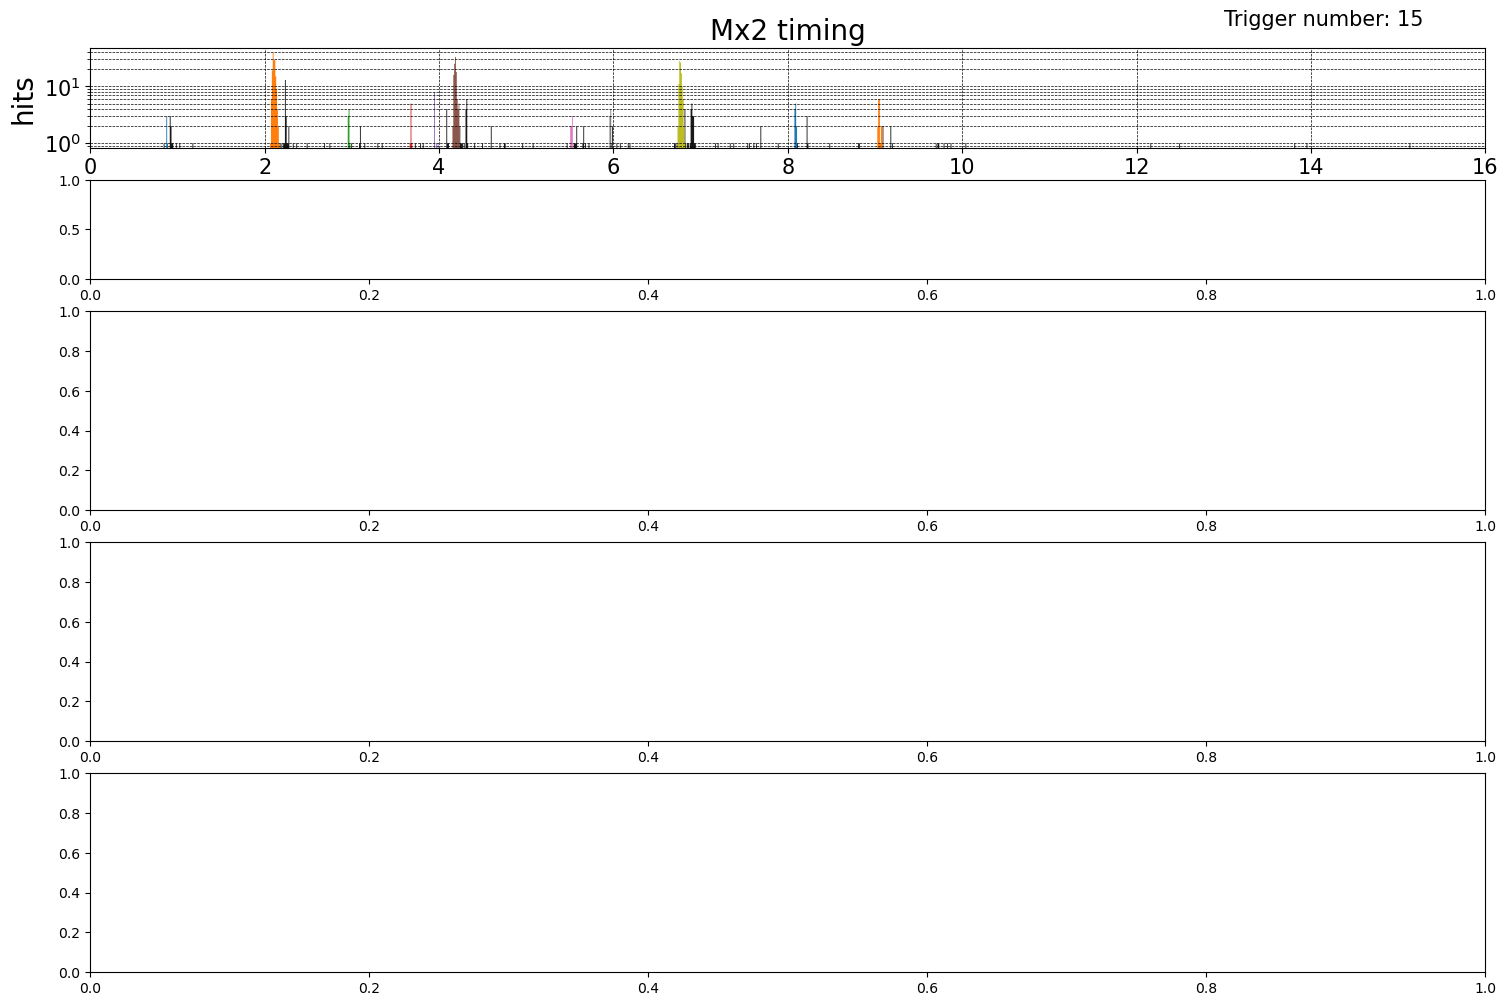

In [88]:

# Initial event number
f = view_event(Mx2Hits, NdFlow, 15, is_mc=True )

In [38]:
Mx2Hits = Mx2Data("/global/cfs/cdirs/dune/users/noeroy/for_maria/mx2_root/TS1_00050017_0005_numib_v09-2024_07_09_00_04_33_DST.root")
NdFlow = NdData('/global/cfs/cdirs/dune/www/data/2x2/sandbox/v8/flow/packet-0050017-2024_07_09_00_04_33_CDT.FLOW.hdf5')

light sel:  [(212, 213)]
Time values:
[6.912]


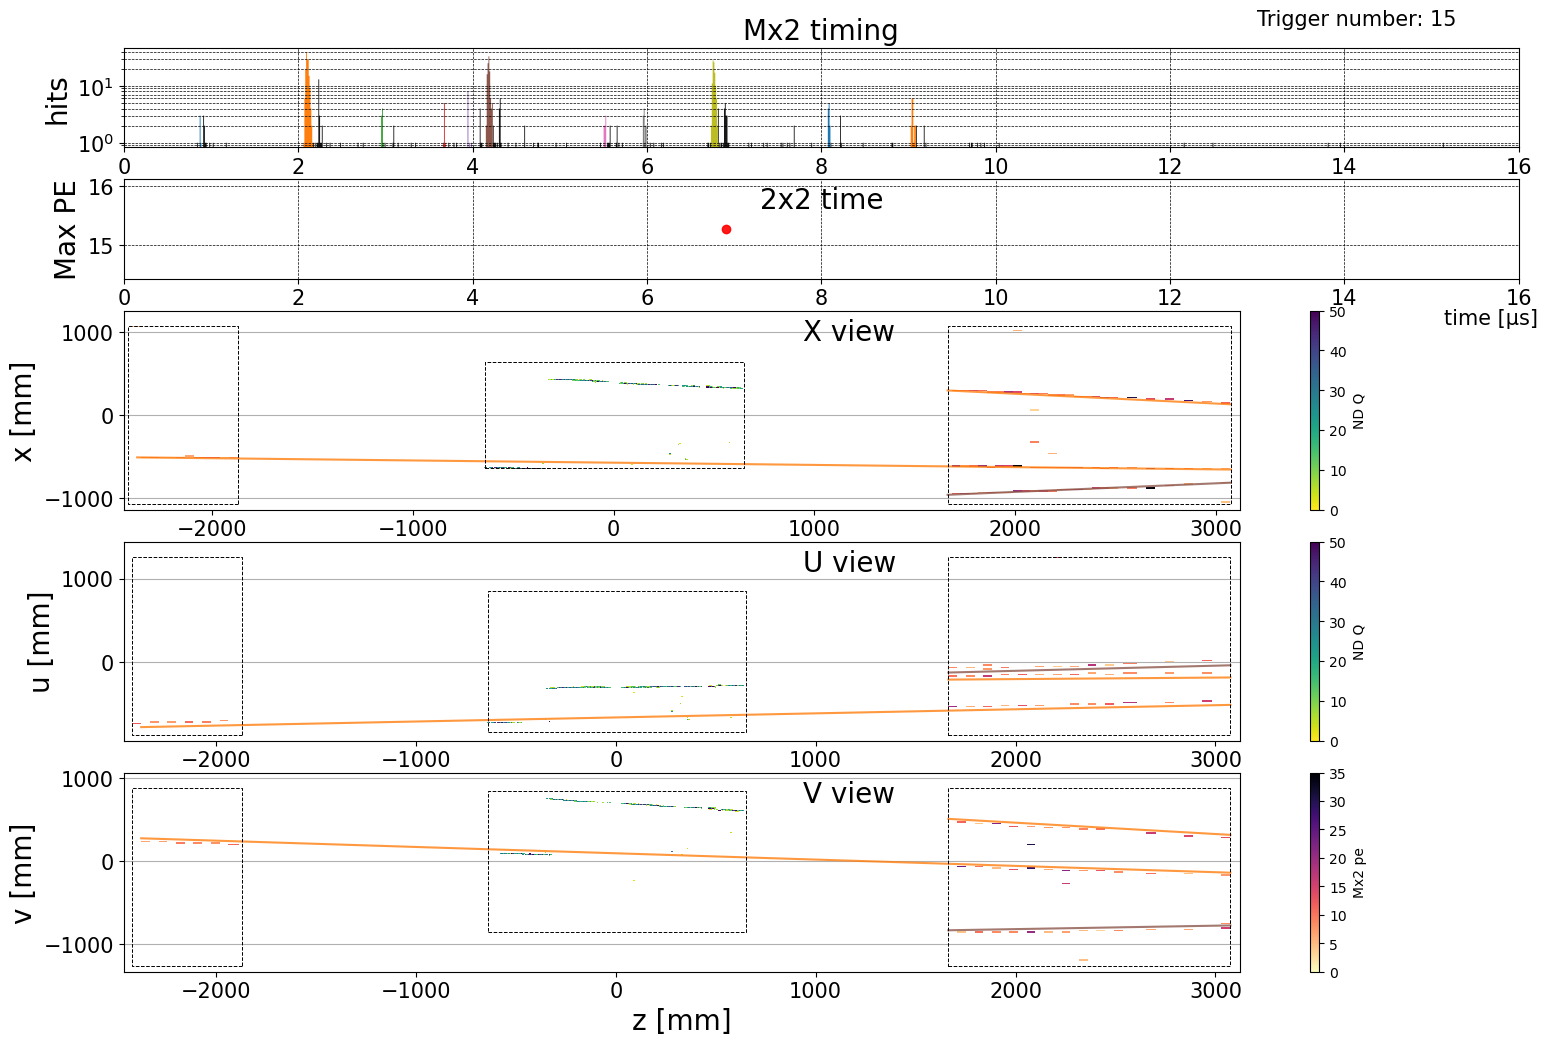

In [89]:
f = view_event(Mx2Hits, NdFlow, 15, is_mc=False )

light sel:  [(48, 49)]
Time values:
[6.8   2.752 8.32  6.768 8.288 8.592 9.344 8.608 8.592 9.344]


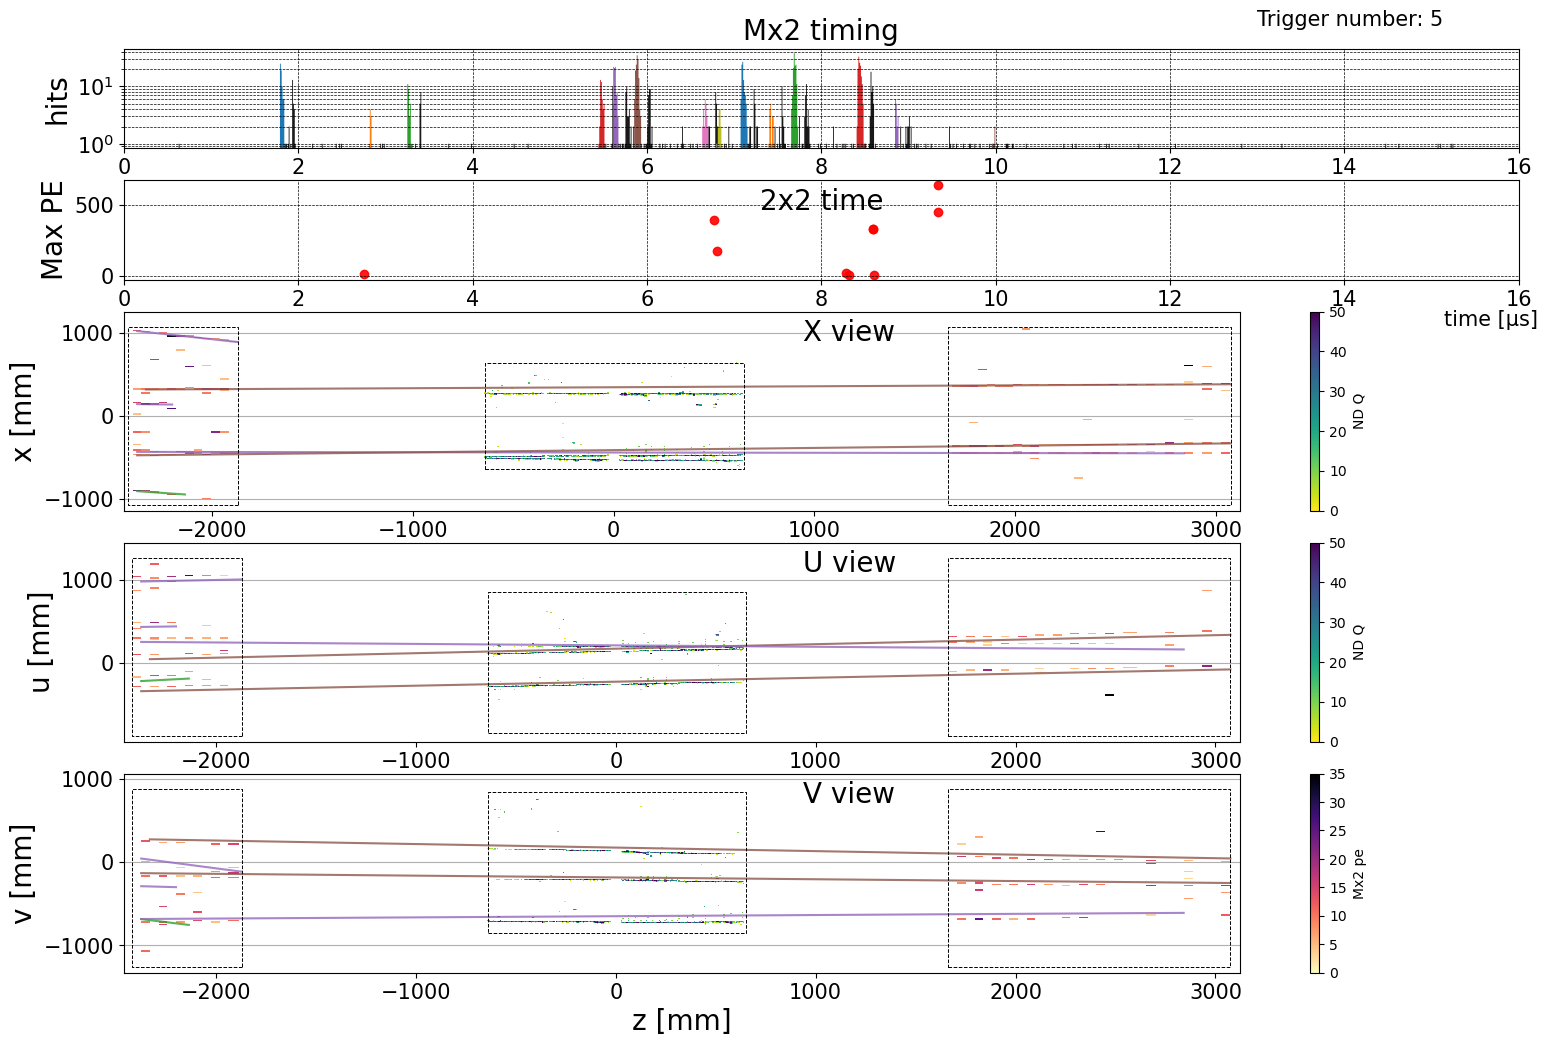

In [47]:
f = view_event(Mx2Hits, NdFlow, 5, is_mc=False )

light sel:  [(212, 213)]
Time values:
[6.912]


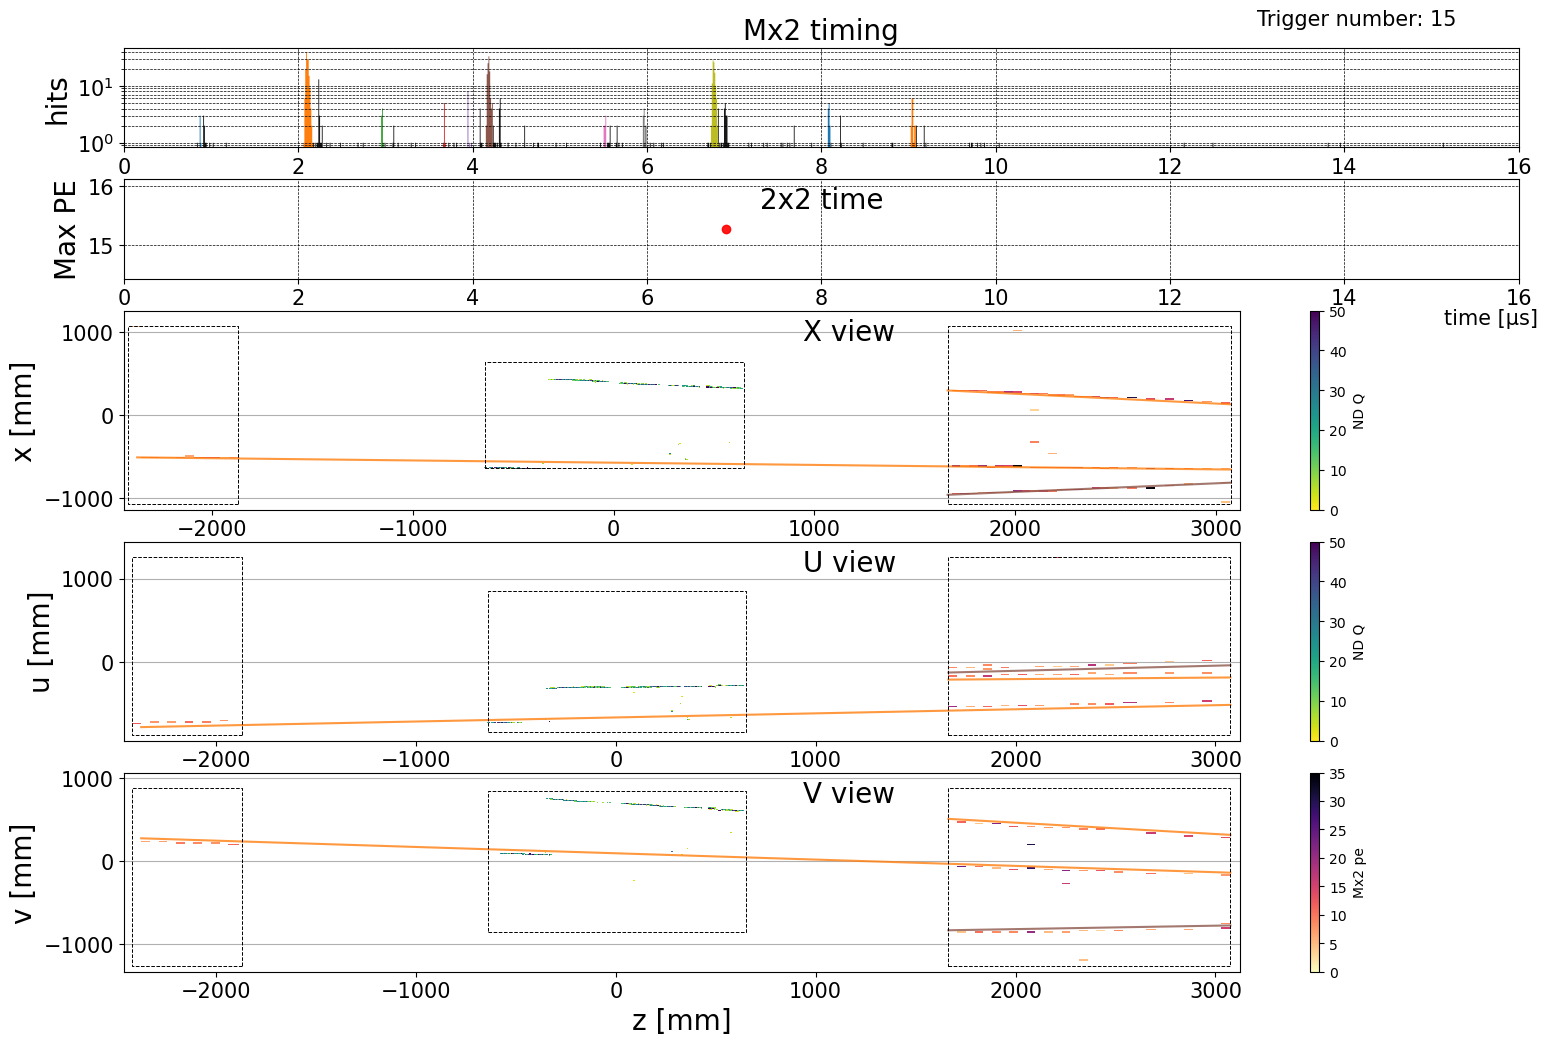

In [76]:
f = view_event(Mx2Hits, NdFlow, 15, is_mc=False )

In [77]:
entry=15

In [82]:
NdFlow.flow_file['charge/events/data'][NdFlow.ext_trig_sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][NdFlow.ext_trig_sel[:,1]]["iogroup"]==5][mask_trig]

array([(2810, 543, 20946., 8932199., 8934174., 1, 1720501492)],
      dtype=[('id', '<u8'), ('nhit', '<u4'), ('ADC', '<f8'), ('ts_start', '<f8'), ('ts_end', '<f8'), ('n_ext_trigs', '<u4'), ('unix_ts', '<u8')])

In [83]:
NdFlow.flow_file['charge/events/data'][2810]

(2810, 543, 20946., 8932199., 8934174., 1, 1720501492)

In [84]:
NdFlow.flow_file['charge/events/ref/light/events/ref_region'][2810]

(212, 213)

In [58]:
NdFlow.flow_file['charge/events/ref/light/events/ref_region'][NdFlow.ext_trig_sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][NdFlow.ext_trig_sel[:,1]]["iogroup"]==5][mask_trig]

array([(182, 183), (198, 199)], dtype=[('start', '<i4'), ('stop', '<i4')])

In [64]:
ref = NdFlow.flow_file['light/events/ref/light/flash/ref']
ref[ref[:,0] == 182]

(251, 252)

In [85]:
NdFlow.flow_file['light/events/ref/light/flash/ref_region'][212]

(291, 292)

In [86]:
NdFlow.flow_file["light/flash/data"][291]

(291, 2, 1, [432, 432], [6912., 6912.], [6877.9033, 6877.9033], 97.07864, 15.271858, 87.705215, 19.769054, [[-8.87246989e-03, -1.73378754e-02, -2.68800147e-02,  6.16643988e-02, -6.34637987e-03,  1.05631503e-03, -5.02465293e-02, -2.40633190e-02, -3.58162187e-02, -3.77442501e-02, -1.01676001e-03, -3.33312005e-02,  2.81147994e-02,  3.46322916e-02,  1.19594848e-02, -7.92099978e-04,  4.70090002e-01,  1.92279853e-02,  1.19996099e-02,  1.81496255e-02,  6.92772269e-02,  7.27818022e-03,  1.41015155e-02,  2.98489988e-01], [-3.92280007e-03, -1.57787148e-02,  1.16319302e-02,  1.07467799e-02, -3.00321300e-02,  3.12261516e-03, -6.15001619e-02, -7.81200007e-02, -2.62168813e-02, -7.00211991e-03, -2.52351221e-02, -3.55798006e-02, -3.25539522e-02,  1.76552739e-02, -6.21780008e-02, -3.37972003e-03, -2.89749242e-02, -4.26442511e-02, -1.27214000e-01, -1.06933318e-01, -1.63775131e-01,  1.18526804e+00,  8.10986614e+00,  7.16199207e+00]], [[-8.87246989e-03, -1.73378754e-02, -2.68800147e-02,  6.16643988e-02, -

In [87]:
NdFlow.flow_file["light/flash/data"][:0]

array([],
      dtype=[('id', '<u4'), ('tpc', 'u1'), ('n_sum_hits', '<u4'), ('sample_range', '<u2', (2,)), ('hit_time_range', '<f4', (2,)), ('rising_spline_range', '<f4', (2,)), ('tot_sum', '<f4'), ('tot_max', '<f4'), ('tot_sum_spline', '<f4'), ('tot_max_spline', '<f4'), ('deconv_sum', '<f4', (2, 24)), ('deconv_max', '<f4', (2, 24))])

In [57]:
mask_trig = abs(NdFlow.time_trig - Mx2Hits.minerva_time[14]) < .9


nd_selection =  NdFlow.match_region[NdFlow.ext_trig_sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][NdFlow.ext_trig_sel[:,1]]["iogroup"]==5][mask_trig]

In [78]:
mask_trig = (abs(NdFlow.time_trig - Mx2Hits.minerva_time[entry]) < .9) & (Mx2Hits.ev_gps_time_sec[entry] == NdFlow.nd_time_unix_trig)
NdFlow.time_trig[mask_trig]

array([1.72050149e+09])

In [79]:
Mx2Hits.minerva_time[entry]

1720501492.078367

In [80]:
NdFlow.time_trig[mask_trig][1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [81]:
NdFlow.time_trig[mask_trig][0]

1720501492.89322

In [19]:
mask_trig = abs(NdFlow.time_trig - Mx2Hits.minerva_time[entry]) < .9

light_sel = NdFlow.flow_file['charge/events/ref/light/events/ref_region'][NdFlow.ext_trig_sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][NdFlow.ext_trig_sel[:,1]]["iogroup"]==5][mask_trig] #light event associated to charge associated to Mx2


456

In [24]:
[NdFlow.flow_file["charge/ext_trigs/data"][NdFlow.ext_trig_sel[:,1]]["iogroup"]==5]

[array([False, False, False, ..., False, False, False])]

In [18]:
NdFlow.match_region[NdFlow.ext_trig_sel[:,0]].size

7876

In [27]:
NdFlow.flow_file["charge/events/data"][995]

(995, 16, 507., 4223801., 4226022., 0, 1720501477)

In [23]:
NdFlow.flow_file["charge/events/data"][:0]

array([],
      dtype=[('id', '<u8'), ('nhit', '<u4'), ('ADC', '<f8'), ('ts_start', '<f8'), ('ts_end', '<f8'), ('n_ext_trigs', '<u4'), ('unix_ts', '<u8')])

In [ ]:
f = view_event(Mx2Hits, NdFlow, 60, is_mc=False )

In [243]:
entry=1
mask2 = NdFlow.flow_file["charge/events/data"]["n_ext_trigs"] == 1

mask_trig = abs(NdFlow.nd_time[mask2] - Mx2Hits.minerva_time[entry]) < .9

    
mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 5  

# NdFlow.flow_file["charge/events/data"][mask2][mask_trig2 & mask_trig]

nd_selection =  NdFlow.match_region[mask2][mask_trig2 & mask_trig]

In [84]:
NdFlow.nd_time.size

75841

In [86]:
sel = NdFlow.flow_file["charge/events/ref/charge/ext_trigs/ref"]
time_trig = NdFlow.nd_time[sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][sel[:,1]]["iogroup"]==5]

In [87]:
mask = abs(time_trig- Mx2Hits.minerva_time[10]) < .9

In [88]:
time_trig[mask]

array([1.72050149e+09])

In [164]:
abs(NdFlow.nd_time - Mx2Hits.minerva_time[10])[mask & mask2]

array([0.89896989, 0.75230575, 0.59759378, 0.22955346, 0.22474551,
       0.1283679 , 0.81422424, 0.78326488, 0.75119114, 0.28417325,
       0.32347608, 0.4912765 , 0.5311377 , 0.45307779, 0.39740229,
       0.81480098, 0.82854414, 0.05158043, 0.01378775, 0.00782299,
       0.06849384, 0.08098626, 0.08482623, 0.19658184, 0.23525667,
       0.25009322, 0.25830173, 0.27207279, 0.4432416 , 0.54090929,
       0.55585647, 0.64086294])

In [24]:
mask2 = NdFlow.flow_file["charge/events/data"]["n_ext_trigs"] == 1 # Charge event associated to an external trigger (light or beam)

mask_trig = abs(NdFlow.nd_time[mask2] - Mx2Hits.minerva_time[entry]) < .9 #time condition to match 
if (is_mc):
    mask_trig = abs(NdFlow.nd_time[mask2] - float(Mx2Hits.minerva_time[entry] - Mx2Hits.minerva_time[0])) < .9 #subtracting t0 offset for Mx2
    
mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 5  
if (is_mc):
    mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 1  

nd_selection =  NdFlow.match_region[mask2][mask_trig2 & mask_trig]

NameError: name 'entry' is not defined

In [ ]:
mask_trig = abs(NdFlow.time_trig - Mx2Hits.minerva_time[entry]) < .9

light_sel = NdFlow.flow_file['charge/events/ref/light/events/ref_region'][NdFlow.ext_trig_sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][NdFlow.ext_trig_sel[:,1]]["iogroup"]==5][mask_trig] #light event associated to charge associated to Mx2
    

In [222]:
mask2 = NdFlow.flow_file["charge/events/data"]["n_ext_trigs"] == 1

In [223]:
mask_trig.shape

(7876,)

In [228]:
mask2 = NdFlow.flow_file["charge/events/data"]["n_ext_trigs"] == 1
mask_trig = abs(NdFlow.nd_time[mask2] - Mx2Hits.minerva_time[1]) < .9

mask_trig = abs(NdFlow.nd_time - float(Mx2Hits.minerva_time[1] - Mx2Hits.minerva_time[0])) < .9

mask_trig2 = NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"] == 5  
NdFlow.flow_file["charge/events/data"][mask2][mask_trig2 & mask_trig]

array([],
      dtype=[('id', '<u8'), ('nhit', '<u4'), ('ADC', '<f8'), ('ts_start', '<f8'), ('ts_end', '<f8'), ('n_ext_trigs', '<u4'), ('unix_ts', '<u8')])

In [233]:
NdFlow.flow_file["charge/ext_trigs/data"]["iogroup"]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [226]:
mask_trig

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [215]:
mask_trig2

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [149]:
NdFlow.flow_file["charge/events/ref/light/events/ref"][:10]

array([[789,   0],
       [794,   1],
       [797,   2],
       [856,   3],
       [865,   4],
       [868,   5],
       [873,   6],
       [878,   7],
       [884,   8],
       [911,   9]], dtype=uint32)

In [20]:
def compute_distances(x_nodes, y_nodes, z_nodes):
    # Define start and end points of the track
    x0, y0, z0 = x_nodes[0], y_nodes[0], z_nodes[0]
    xN, yN, zN = x_nodes[-1], y_nodes[-1], z_nodes[-1]

    # Compute expected track positions at each z
    x_track = x0 + (xN - x0) / (zN - z0) * (z_nodes - z0)
    y_track = y0 + (yN - y0) / (zN - z0) * (z_nodes - z0)

    # Compute distances in X and Y directions
    x_distances = x_nodes - x_track
    y_distances = y_nodes - y_track

    return x_distances, y_distances

    
def compute_distances_full (Mx2Hits_cal, shift = 0):
    dx_cal = np.array([])
    dy_cal = np.array([])
    z_cal = np.array([])
    xa_cal = np.array([])
    ya_cal = np.array([])
    for entry in range(400):
        for idx in Mx2Hits_cal.trk_index[entry]:
            n_nodes = Mx2Hits_cal.trk_nodes[entry][idx]
            if ((n_nodes >0)):
                # print( "t", Mx2Hits.trk_node_Z[entry][idx][0])
                x_nodes = Mx2Hits_cal.trk_node_X[entry][idx][:n_nodes]
                y_nodes = Mx2Hits_cal.trk_node_Y[entry][idx][:n_nodes]

                ax_nodes = Mx2Hits_cal.trk_node_aX[entry][idx][:n_nodes]
                ay_nodes = Mx2Hits_cal.trk_node_aY[entry][idx][:n_nodes]
                
                z_nodes = Mx2Hits_cal.trk_node_Z[entry][idx][:n_nodes]
                x_nodes = np.where(z_nodes < 6000, x_nodes-shift,x_nodes)
                # x_nodes = np.where(z_nodes < 6000, x_nodes,x_nodes+1200)
                trk_phi = Mx2Hits_cal.trk_phi[entry][idx]
                trk_theta = Mx2Hits_cal.trk_theta[entry][idx]
                # if (z_nodes[0]>5000):
                #     continue
                if (z_nodes[0]>6000):
                    continue
                if (z_nodes[n_nodes-1]<6000):
                    continue
                # if (filter_tracks(x_nodes, y_nodes, z_nodes,0.1) >5):
                #     continue
                # x_dist, y_dist= compute_distances_v2(x_nodes, y_nodes, z_nodes, x_nodes[n_nodes-1], y_nodes[n_nodes-1], z_nodes[n_nodes-1], trk_phi, trk_theta)
                # x_dist, y_dist= compute_distances_v2(x_nodes, y_nodes, z_nodes, x_nodes[0], y_nodes[0], z_nodes[0], trk_phi, trk_theta)
                x_dist, y_dist= compute_distances(x_nodes, y_nodes, z_nodes)
                dx_cal = np.concatenate((dx_cal,x_dist))
                dy_cal = np.concatenate((dy_cal,y_dist))
                z_cal = np.concatenate((z_cal,z_nodes))
                xa_cal = np.concatenate((xa_cal,ax_nodes))
                ya_cal = np.concatenate((ya_cal,ay_nodes))
    return dx_cal, dy_cal, z_cal, xa_cal, ya_cal

In [21]:
dx_v2, dy_v2, z_v2, xa_v2, ya_v2 = compute_distances_full(Mx2Hits)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


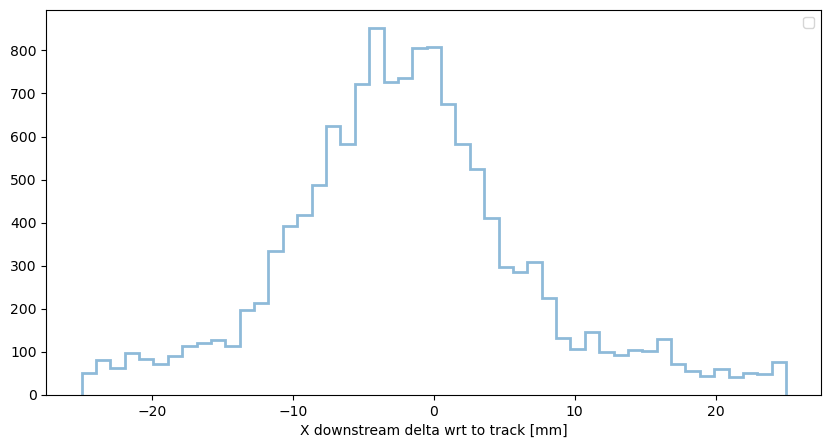

In [23]:
plt.figure(figsize=(10,5))

# plt.hist(dy_cal_v2[(z_cal_v2>6000)  & (z_cal_v2<9400)],bins=np.linspace(-25,25,100),alpha=.5, histtype="step",label="Mx2 no offset",linewidth=2)
plt.hist(dx_v2[(z_v2>6000)  & (z_v2<9400)],bins=np.linspace(-25,25,50),alpha=.5, histtype="step", label="",linewidth=2)
plt.legend()
plt.xlabel("X downstream delta wrt to track [mm]")
# plt.hist(dx_cal_v2[(z_cal_v2>4800)  & (z_cal_v2<6000)],bins=np.linspace(-25,25,100),alpha=.5, histtype="step")
# plt.hist(dx_sim_v2[(z_sim_v2>4800)  & (z_sim_v2<6000)],bins=np.linspace(-25,25,100),alpha=.5, histtype="step")

plt.show()

In [31]:
NdFlow.flow_file["charge/ext_trigs/data"][:0]

array([],
      dtype=[('id', '<u8'), ('ts', '<f8'), ('ts_raw', '<u8'), ('type', '<i2'), ('iogroup', 'u1')])

In [32]:
NdFlow.flow_file["charge/ext_trigs/data"]["ts"]

array([1185851.3238609 , 1484462.39816657, 2062731.60553202, ...,
       9459297.6761772 , 9740518.80439171,  100446.68861527])

In [33]:
NdFlow.flow_file["charge/events/data"][:0]

array([],
      dtype=[('id', '<u8'), ('nhit', '<u4'), ('ADC', '<f8'), ('ts_start', '<f8'), ('ts_end', '<f8'), ('n_ext_trigs', '<u4'), ('unix_ts', '<u8')])

In [34]:
t0 = NdFlow.flow_file["charge/events/data"]["unix_ts"][0]

In [38]:
mask = NdFlow.flow_file["charge/events/data"]["n_ext_trigs"]>0

In [44]:
NdFlow.flow_file["charge/events/ref/charge/ext_trigs/ref_region"][mask][:10]

array([(0,  1), (1,  2), (2,  3), (3,  4), (4,  5), (5,  6), (6,  7),
       (7,  8), (8,  9), (9, 10)],
      dtype=[('start', '<i4'), ('stop', '<i4')])

In [65]:
NdFlow.flow_file["charge/events/ref/charge/calib_prompt_hits/ref_region"][sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][sel[:,1]]["iogroup"]==5]

array([(  15322,   16125), (  24137,   24591), (  27932,   27939),
       (  32264,   33019), (  37153,   43877), (  49802,   51960),
       (  56611,   56623), (  59837,   60733), (  65340,   66292),
       (  69887,   69913), (  74298,   74615), (  78898,   80241),
       (  84777,   85973), ( 102845,  102860), ( 108663,  112492),
       ( 115611,  116154), ( 119501,  119512), ( 124339,  125536),
       ( 130244,  131346), ( 134743,  134754), ( 140105,  140785),
       ( 149303,  149944), ( 155864,  156481), ( 159858,  159883),
       ( 164283,  164295), ( 169638,  169650), ( 174938,  174971),
       ( 179471,  179487), ( 183210,  183438), ( 189071,  189884),
       ( 193510,  194643), ( 203300,  203317), ( 206634,  208697),
       ( 212616,  216365), ( 236844,  237569), ( 242169,  243078),
       ( 246772,  248480), ( 253665,  254298), ( 259077,  260153),
       ( 265122,  265264), ( 269820,  270703), ( 277047,  277162),
       ( 280449,  281935), ( 285490,  286562), ( 290118,  2901

In [47]:
sel = NdFlow.flow_file["charge/events/ref/charge/ext_trigs/ref"]
data = NdFlow.flow_file["charge/events/data"][sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][sel[:,1]]["iogroup"]==5]

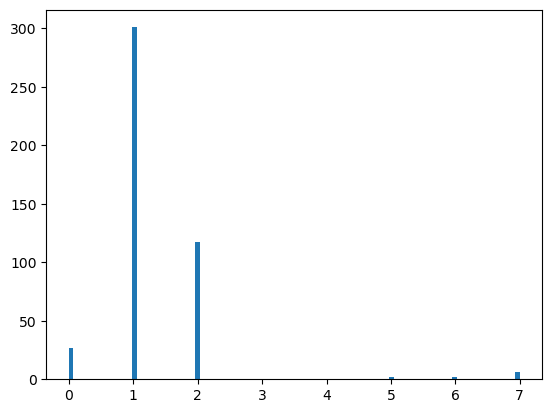

In [52]:
sel = NdFlow.flow_file["charge/events/ref/charge/ext_trigs/ref"]
data = NdFlow.flow_file["charge/events/data"][sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][sel[:,1]]["iogroup"]==5]
plt.hist(data["unix_ts"][1:] - data["unix_ts"][0:-1] , bins=100)
plt.show()

In [67]:
NdFlow.flow_file["charge/events/ref/charge/calib_prompt_hits/ref_region"][sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][sel[:,1]]["iogroup"]==5][13]

(102845, 102860)

In [68]:
NdFlow.flow_file["charge/events/ref/charge/calib_prompt_hits/ref_region"][sel[:,0]][NdFlow.flow_file["charge/ext_trigs/data"][sel[:,1]]["iogroup"]==5][14]

(108663, 112492)

In [54]:
np.where(data["unix_ts"][1:] - data["unix_ts"][0:-1] == 0)

(array([ 13,  27,  35,  47,  51,  82, 114, 168, 178, 188, 197, 208, 230,
        251, 255, 260, 264, 269, 275, 289, 304, 348, 373, 376, 381, 387,
        449]),)

In [62]:
for i in np.where(data["unix_ts"][1:] - data["unix_ts"][0:-1] == 0)[0]:


15 3829
16 228
909 1708
2092 494
843 722
1002 1363
183 1080
654 2132
10 9
135 42
15 162
17 1456
9 19
685 27
640 11
3066 1693
2230 14
1063 9
1325 695
13 346
8020 1534
1029 1115
40 654
11 37
538 1387
20 342
725 9


In [60]:
data[27]

(4655, 16, 561., 3000174., 3001670., 1, 1720501507)

In [61]:
data[28]

(4811, 228, 8835., 5006681.48864147, 5008393., 1, 1720501507)

In [58]:
data[:0]

array([],
      dtype=[('id', '<u8'), ('nhit', '<u4'), ('ADC', '<f8'), ('ts_start', '<f8'), ('ts_end', '<f8'), ('n_ext_trigs', '<u4'), ('unix_ts', '<u8')])

In [78]:
f = h5.File('/pscratch/sd/m/mkramer/devel/ndlar_reflow/sandbox_output/packet-0050017-2024_07_09_00_34_36_CDT.FLOW.hdf5')

In [71]:
sel = f["charge/events/ref/charge/ext_trigs/ref"]
data = f["charge/events/data"][sel[:,0]][f["charge/ext_trigs/data"][sel[:,1]]["iogroup"]==5]
plt.hist(data["unix_ts"][1:] - data["unix_ts"][0:-1] , bins=100)
plt.show()

KeyError: 'Unable to synchronously open object (component not found)'

In [79]:
f["charge"].keys()

<KeysViewHDF5 ['packets', 'pps_delay', 'raw_events']>